# Normal Discriminant Analysis

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm, multivariate_normal  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## One dimensional normal law

In [2]:
X_10 = pd.DataFrame(np.random.normal(loc=0.0, scale=1.0, size=[500,1]),columns=['Point'])
X_10['Class'] = 0
X_11 = pd.DataFrame(np.random.normal(loc=7, scale=1.0, size=[500,1]),columns=['Point'])
X_11['Class'] = 1
X = X_10.append(X_11).reset_index(drop=True)

In [3]:
X.columns = ['Point','Class'] 

In [4]:
X.head()

,Point,Class
0,-0.104515,0
1,-1.637920,0
2,-1.276725,0
3,0.544165,0
4,-2.081582,0


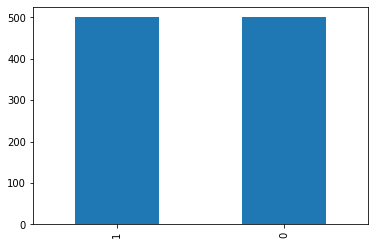

In [5]:
X.Class.value_counts().plot(kind="bar")

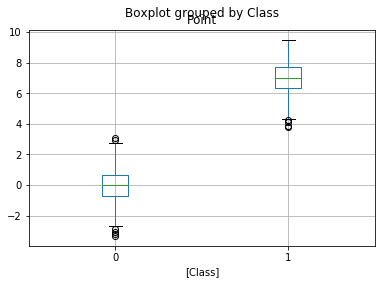

In [6]:
X.boxplot(by="Class")

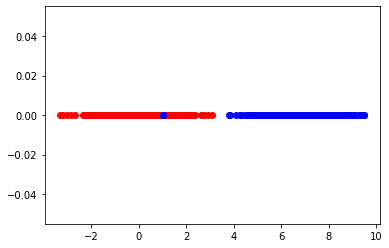

In [7]:
val = 0. # this is the value where you want the data to appear on the y-axis.
x_0 = X[X.Class==0]
x_1 = X[X.Class==1]
plt.plot(x_0, np.zeros_like(x_0) + val, 'o',c='r')
plt.plot(x_1, np.zeros_like(x_1) + val, 'o',c='b')
plt.show()

In [8]:
mean0 = X[X.Class==0].Point.mean()
std0 = X[X.Class==0].Point.std()
mean1 = X[X.Class==1].Point.mean()
std1 = X[X.Class==1].Point.std()

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


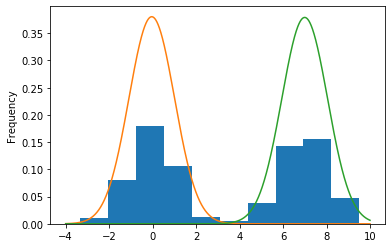

In [9]:
X.Point.plot(kind='hist', normed=True)
range_ = np.arange(-4, 10, 0.001)
plt.plot(range_, norm.pdf(range_,mean0,std0))
plt.plot(range_, norm.pdf(range_,mean1,std1))

Bayes

$P(Y|X)=\frac{P(X|Y)P(Y)}{P(X)}$

P(Y==i) = proba de faire parti de Y = nb de point dans Y==i

Densité:

$P(X|Y=0) = norm.pdf(X.Point[0],Ymean0,Ystd0)$


$P(X|Y=1) = norm.pdf(X.Point[0],Ymean1,Ystd1)$

$P(X) = P(X|Y=0)+P(X|Y=1)$

In [10]:
p_y0 = (X.Class.value_counts()/X.shape[0])[0]
p_y1 = (X.Class.value_counts()/X.shape[0])[1]

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X.Point, X.Class, test_size=0.33, random_state=42)

In [12]:
mean0 = X_train.loc[Y_train[Y_train==0].index.tolist()].mean()
std0 = X_train.loc[Y_train[Y_train==0].index.tolist()].std()
mean1 = X_train.loc[Y_train[Y_train==1].index.tolist()].mean()
std1 = X_train.loc[Y_train[Y_train==1].index.tolist()].std()

In [13]:
def nda(X,mean0,std0,mean1,std1,pred=False):
    y_prob = pd.DataFrame(columns=['class0','class1'])
    for i in X:
        p0 = norm.pdf(i, mean0, std0)
        p1 = norm.pdf(i, mean1, std1)
        p01 = p0 + p1
        y_prob = y_prob.append({'class0':p0*p_y0/p01, 'class1':p1*p_y1/p01}, ignore_index=True)
    
    if pred:
        y_pred = y_prob.apply(lambda x: 0 if x[0]>x[1] else 1,axis=1)
        return y_prob, y_pred
    
    return y_proba

In [14]:
_, pred = nda(X_test,mean0,std0,mean1,std1,pred=True)

In [15]:
print("Accuracy test : ", accuracy_score(Y_test, pred))

Accuracy test :  1.0


## Multidimensional   

### Two dimensional

In [16]:
X_10 = pd.DataFrame(np.random.normal(loc=0.0, scale=1.0, size=[500,2]),columns=['Point0','Point1'])
X_10['Class'] = 0
X_11 = pd.DataFrame(np.random.normal(loc=7, scale=1.0, size=[500,2]),columns=['Point0','Point1'])
X_11['Class'] = 1
X = X_10.append(X_11).reset_index(drop=True)

In [17]:
X.head()

,Point0,Point1,Class
0,1.279250,-0.592280,0
1,1.454893,-0.074377,0
2,0.813441,-1.604180,0
3,0.590028,0.572838,0
4,1.230053,-0.711421,0


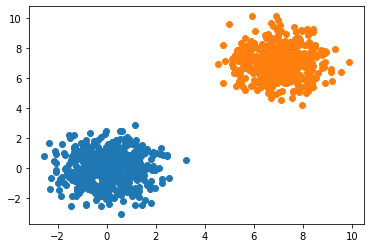

In [18]:
plt.plot(X[X.Class==0].Point0,X[X.Class==0].Point1,"o")
plt.plot(X[X.Class==1].Point0,X[X.Class==1].Point1,"o")
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1a2aa27d0>,
      dtype=object)

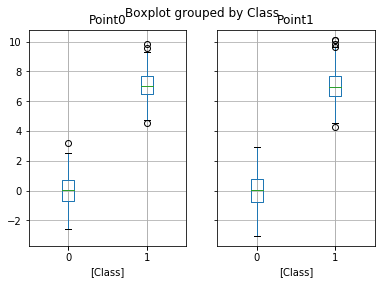

In [19]:
X.boxplot(by='Class')

In [20]:
mean0 = X[X.Class==0][['Point0','Point1']].mean().tolist()
std0 = X[X.Class==0][['Point0','Point1']].corr()
mean1 = X[X.Class==1][['Point0','Point1']].mean().tolist()
std1 = X[X.Class==1][['Point0','Point1']].corr()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1a2c4fd90>,
      dtype=object)

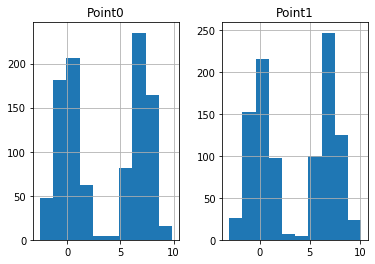

In [21]:
X[['Point0','Point1']].hist()

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X[['Point0','Point1']], X.Class, test_size=0.33, random_state=42)

In [23]:
p_y0 = (Y_train.value_counts()/Y_train.shape[0])[0]
p_y1 = (Y_train.value_counts()/Y_train.shape[0])[1]

In [24]:
mean0 = X_train.loc[Y_train[Y_train==0].index.tolist()].mean().tolist()
std0 = X_train.loc[Y_train[Y_train==0].index.tolist()].corr()
mean1 = X_train.loc[Y_train[Y_train==1].index.tolist()].mean().tolist()
std1 = X_train.loc[Y_train[Y_train==1].index.tolist()].corr()

In [25]:
def nda_multi(X,mean0,std0,mean1,std1,pred=False):
    y_prob = pd.DataFrame(columns=['class0','class1'])
    for i in range(X.shape[0]):
        p0 = multivariate_normal.pdf(X.iloc[i], mean0, std0)
        p1 = multivariate_normal.pdf(X.iloc[i], mean1, std1)
        p01 = p0 + p1
        y_prob = y_prob.append({'class0':p0*p_y0/p01, 'class1':p1*p_y1/p01}, ignore_index=True)
    
    if pred:
        y_pred = y_prob.apply(lambda x: 0 if x[0]>x[1] else 1,axis=1)
        return y_prob, y_pred
    
    return y_proba

In [26]:
_, pred_multi = nda_multi(X_train,mean0,std0,mean1,std1,pred=True)

In [27]:
print("Accuracy test : ", accuracy_score(Y_train, pred_multi))

Accuracy test :  1.0


In [28]:
_, pred_multi_test = nda_multi(X_test,mean0,std0,mean1,std1,pred=True)

print("Accuracy test : ", accuracy_score(Y_test, pred_multi_test))

Accuracy test :  1.0


## N-dimentional

In [29]:
n = 4

In [30]:
col = []
for i in range(n):
    col.append('Point'+str(i))

In [31]:
col

['Point0', 'Point1', 'Point2', 'Point3']

In [32]:
X_10 = pd.DataFrame(np.random.normal(loc=0.0, scale=1.0, size=[500,n]),columns=col)
X_10['Class'] = 0
X_11 = pd.DataFrame(np.random.normal(loc=7, scale=1.0, size=[500,n]),columns=col)
X_11['Class'] = 1
X = X_10.append(X_11).reset_index(drop=True)

In [33]:
X.head()

,Point0,Point1,Point2,Point3,Class
0,-1.289276,-0.130368,0.305328,-0.630811,0
1,-0.888008,0.683766,-1.001588,-1.136042,0
2,0.662195,-0.292937,-0.213179,0.725318,0
3,1.231471,-0.185614,0.018832,-0.886759,0
4,0.918524,-0.420438,-0.253913,0.009852,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1a30cd990>,
      dtype=object)

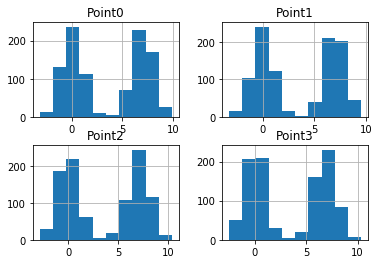

In [34]:
X[col].hist()

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X[col], X.Class, test_size=0.33, random_state=42)

In [36]:
mean0 = X_train.loc[Y_train[Y_train==0].index.tolist()].mean().tolist()
corr0 = X_train.loc[Y_train[Y_train==0].index.tolist()].corr()
mean1 = X_train.loc[Y_train[Y_train==1].index.tolist()].mean().tolist()
corr1 = X_train.loc[Y_train[Y_train==1].index.tolist()].corr()

In [37]:
Y_train.value_counts()

1    335
0    335
Name: Class, dtype: int64

In [38]:
p_y0 = (Y_train.value_counts()/Y_train.shape[0])[0]
p_y1 = (Y_train.value_counts()/Y_train.shape[0])[1]

In [39]:
_, pred_multi = nda_multi(X_train,mean0,corr0,mean1,corr1,pred=True)

In [40]:
print("Accuracy test : ", accuracy_score(Y_train, pred_multi))

Accuracy test :  1.0


In [41]:
_, pred_multi_test = nda_multi(X_test,mean0,corr0,mean1,corr1,pred=True)

print("Accuracy test : ", accuracy_score(Y_test, pred_multi_test))

Accuracy test :  1.0
